**Artificial Inteligence: UCS411**
**Assignment 3**

**Note:** As a data scientist, you have been assigned a job to solve the 8 puzzle problem. To generate the states of the search space, you need to define the rules/operators properly. As a solution, you need to print
the intermediate steps of the solution as well as total number of moves used to achieve the goal state.

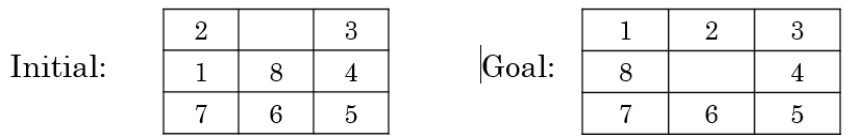

**Question 1:** If the initial and final states are as given, find the value of Heuristic function, by taking
(i) Euclidean Distance
(ii) Manhattan Distance
(iii) Minkowski Distance

In [ ]:
# to use the deep copy fucntion
import copy
# to use absolute and square root functions
import math
# to create 2D array and reshape them
import numpy as np

# declaring the variables(user input) as global 
p = 3
s = [[2,0,3],[1,8,4],[7,6,5]]
g = [[1,2,3],[8,4,0],[7,6,5]]

# this function finds the position of "elem" in the state "s"
def find_pos(s,elem):
    # for each of the rows in the given state
    for i in range(len(s)):
        # for each of the element in each row
        for j in range(len(s[0])):
            # check if the selcted element is equal to the element to be found
            if s[i][j] == elem:
                # return the indices of row and column if yes
                return [i,j]
    # in case of error return -1
    return -1

# function to find the eucledian distance
def Eucledian():
    # create an empty matrix of zeroes
    res_mat = np.zeros(len(s)*len(s[0]),dtype = float)
    # reshape this matrix in shape of the given initial state matrix
    res_mat = res_mat.reshape(len(s),len(s))
    
    # now traverse the matrix for each element
    # for each row in state
    for x1 in range(len(s)):
        # for each column in that row
        for y1 in range(len(s[0])):
            # elem is the element at each index
            elem = s[x1][y1]
            # find the correct position of this element in the goal state
            x2,y2 = find_pos(g,elem)
            # calculate the eucledian distance for each element 
            res_mat[x1][y1] = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    # initialise sum as zero        
    summ = 0
    # for each of the rows in the res_mat 
    for i in range(len(res_mat)):
        # sum the entire row and add this sum to summ variable
        summ += sum(res_mat[i])
    # return the final calculation 
    return summ


# function to find the manhattan distance
def Manhattan():
    # create an empty matrix of zeroes
    res_mat = np.zeros(len(s)*len(s[0]),dtype = float)
    # reshape this matrix in shape of the given initial state matrix
    res_mat = res_mat.reshape(len(s),len(s))
    
    # now traverse the matrix for each element
    # for each row in state
    for x1 in range(len(s)):
        # for each column in that row
        for y1 in range(len(s[0])):
            # elem is the element at each index
            elem = s[x1][y1]
            # find the correct position of this element in the goal state
            x2,y2 = find_pos(g,elem)
            # calculate the manhattan distance for each element 
            res_mat[x1][y1] = abs(x2-x1) + abs(y2-y1)
    # initialise sum as zero        
    summ = 0
    # for each of the rows in the res_mat 
    for i in range(len(res_mat)):
        # sum the entire row and add this sum to summ variable
        summ += sum(res_mat[i])
    # return the final calculation 
    return summ

def Minkowiski():
    # create an empty matrix of zeroes
    res_mat = np.zeros(len(s)*len(s[0]),dtype = float)
    # reshape this matrix in shape of the given initial state matrix
    res_mat = res_mat.reshape(len(s),len(s))
    
    # now traverse the matrix for each element
    # for each row in state
    for x1 in range(len(s)):
        # for each column in that row
        for y1 in range(len(s[0])):
            # elem is the element at each index
            elem = s[x1][y1]
            # find the correct position of this element in the goal state
            x2,y2 = find_pos(g,elem)
            # calculate the Minkowiski distance for each element 
            res_mat[x1][y1] = ((abs(x2-x1)**p) + (abs(y2-y1)**p))**(1./p)
    # initialise sum as zero        
    summ = 0
    # for each of the rows in the res_mat 
    for i in range(len(res_mat)):
        # sum the entire row and add this sum to summ variable
        summ += sum(res_mat[i])
    # return the final calculation 
    return summ



# call each function turn by turn
sum_Eu = Eucledian()
sum_Mn = Manhattan()
sum_Mk = Minkowiski()
# print the reult  
print("The eucledian distance is: ", sum_Eu)
print("The manhattan distance is: ", sum_Mn)
print("The minkowiski distance is: ", sum_Mk)
print ("*********END*********")

The eucledian distance is:  5.414213562373095
The manhattan distance is:  6.0
The minkowiski distance is:  5.259921049894873
*********END*********


**Question 2:** If the initial and final states are as given *and* H(n): number of misplaced tiles in the current state n as compared to the goal node need to be considered as the heuristic function. You need to use BestFirstSearchalgorithm.

In [1]:
# to use the deep copy fucntion
import copy 

# global variable steps to store teh count of steps
steps = 0

# globally defining the initial state s
s = [[1,2,3],[8,0,4],[7,6,5]]

# globally defining the final state g
g = [[2,0,3],[1,8,4],[7,6,5]]

# globally defining an empty array to serve as memory to the visited states
visited = []

# this function compares the current state passed as parameter and the global goal state
def compare(curr):
    return curr == g
    
# this function finds the positon indeces of the blank tile
def blankTile(s):
    # for each of the rows in the given state
    for i in range(len(s)):
        # for each of the element in each row
        for j in range(len(s[0])):
            # check if the selcted element is equal to the element to be found
            if s[i][j] == 0:
                # return the indices of row and column if yes
                return [i,j]
    # in case of error return -1
    return -1

# this function creates the new state by shifting the blank tile upwards
def up(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the row is 0 then upwards motion is not possible
    if(i==0):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile above it 
    temp[i-1][j],temp[i][j] = temp[i][j],temp[i-1][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile downwards
def down(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the row is last element then downwards motion is not possible
    if (i == len(curr)-1):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile below it 
    temp[i][j],temp[i+1][j] = temp[i+1][j],temp[i][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile towards the left
def left(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the col is first element then left side motion is not possible
    if (j == 0):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile to its left
    temp[i][j],temp[i][j-1] = temp[i][j-1],temp[i][j]
    # return the new state formed
    return temp

# this function creates the new state by shifting the blank tile towards the right
def right(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the col is the last element then left side motion is not possible
    if (j == len(curr[0])-1):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile to its right
    temp[i][j],temp[i][j+1] = temp[i][j+1],temp[i][j]
    # return the new state formed
    return temp

# this function is used to explore the current state: curr
def getStates(curr):
    # create an empty array states to store the newly formed states
    states = []
    # move in every direction once and append the new state to the states array
    states.append(up(curr))
    states.append(down(curr))
    states.append(right(curr))
    states.append(left(curr))
    
    # define an empty array that stores all the new states that are not already in the visited array
    arr = []
    # for each state in states array
    for i in states:
        # check if the state is in the visited array
        if (i not in visited):
            # if not then append it to the array just formed
            arr.append(i)
            
    # if there are new states formed then the length of arr will be > 0
    if(len(arr)==0):
        # if not then return -1 for failure: no new states
        return -1
    # else follow the BEST FIRST SEARCH and return the minimum of the states
    return min(arr)

# this function is used to print the state formed in a board format
def display(state):
    for i in state:
        for j in i:
            print(j, end=' ')
        print()
    print()

# this function is the driver function 
def EightPuzzle():
    # if the inital state is already the goal state then return the same thing back
    if compare(s):
        return s
    # else define a current state
    curr = s
    # call on teh globally defined steps variable
    global steps
    # while the current state is not same as goal state
    while(compare(curr)==0):
            # increment the steps by one
            steps+=1
            # display the current state
            print("step ",steps)
            display(curr)
            # add this state to the visited state array
            visited.append(curr)
            # find the new current state, the next move, as per algorithm
            curr = getStates(curr)
            # if no new state is available: fialure returned by getStates function
            if (curr == -1):
                # print no solution
                return "no solution"
    # else return the current state, which will be goal state after the while loop ends
    return curr

# call the driver function
EightPuzzle()
# print the total number of steps required
print("The total number of steps are: ",steps)
print ("*********END*********")


step  1
1 2 3 
8 0 4 
7 6 5 

step  2
1 0 3 
8 2 4 
7 6 5 

step  3
0 1 3 
8 2 4 
7 6 5 

step  4
8 1 3 
0 2 4 
7 6 5 

step  5
8 1 3 
2 0 4 
7 6 5 

step  6
8 0 3 
2 1 4 
7 6 5 

step  7
0 8 3 
2 1 4 
7 6 5 

step  8
2 8 3 
0 1 4 
7 6 5 

step  9
2 8 3 
1 0 4 
7 6 5 

The total number of steps are:  9
*********END*********


**Question 3:** If the initial and final states are as given and H(n): number of misplaced tiles in the current state n as compared to the goal node need to be considered as the heuristic function. You need to use Hill Climbing algorithm.

**NOTE: THE NUMBER OF STEPS IS ALSO DETERMINED BY THE ORDER OF CALLING THE FUNCTIONS: UP, DOWN, LEFT, RIGHT**

In [2]:
#STEEPEST HILL CLIMBING 
# to use the deep copy fucntion
import copy 

# global variable steps to store teh count of steps
steps = 0

# globally defining the initial state s
s = [[1,2,3],[8,0,4],[7,6,5]]

# globally defining the final state g
g = [[2,0,3],[1,8,4],[7,6,5]]

# globally defining an empty array to serve as memory to the visited states
visited = []

# this function compares the current state passed as parameter and the global goal state
def compare(curr):
    return curr == g
    
# this function finds the positon indeces of the blank tile
def blankTile(s):
    # for each of the rows in the given state
    for i in range(len(s)):
        # for each of the element in each row
        for j in range(len(s[0])):
            # check if the selcted element is equal to the element to be found
            if s[i][j] == 0:
                # return the indices of row and column if yes
                return [i,j]
    # in case of error return -1
    return -1

# this function creates the new state by shifting the blank tile upwards
def up(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the row is 0 then upwards motion is not possible
    if(i==0):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile above it 
    temp[i-1][j],temp[i][j] = temp[i][j],temp[i-1][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile downwards
def down(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the row is last element then downwards motion is not possible
    if (i == len(curr)-1):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile below it 
    temp[i][j],temp[i+1][j] = temp[i+1][j],temp[i][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile towards the left
def left(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the col is first element then left side motion is not possible
    if (j == 0):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile to its left
    temp[i][j],temp[i][j-1] = temp[i][j-1],temp[i][j]
    # return the new state formed
    return temp

# this function creates the new state by shifting the blank tile towards the right
def right(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the col is the last element then left side motion is not possible
    if (j == len(curr[0])-1):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile to its right
    temp[i][j],temp[i][j+1] = temp[i][j+1],temp[i][j]
    # return the new state formed
    return temp

# this function return the heuristic value of the number of misplaced tiles
def heuristic(s):
    # intialise heuristic val to 0
    h_val = 0
    # for each of the rows in the given state
    for i in range(len(s)):
        # for each of the element in each row
        for j in range(len(s[0])):
            # check if the selcted element is equal to the element to be found
            if s[i][j] != g[i][j] :
                # increment the heuristic
                h_val +=1 
    # return the heuristic value
    return h_val
    
# this function is used to explore the current state: curr
def getStates(curr):
    # create an empty array states to store the newly formed states
    states = []
    # move in every direction once and append the new state to the states array
    states.append(left(curr))
    states.append(right(curr))
    states.append(up(curr))
    states.append(down(curr))
    
    
    # define an empty array that stores all the new states that are not already in the visited array
    arr = []
    # for each state in states array
    for i in states:
        # check if the state is in the visited array
        if (i not in visited):
            # if not then append it to the array just formed
            arr.append(i)
    
    # if there are new states formed then the length of arr will be > 0
    if(len(arr)==0):
        # if not then return -1 for failure: no new states
        return -1
    #return min(arr)
    
    # else follow the HILL CLIMBING  and return the minimum of the states
    # create an array to store the heuristic values of each of the state in arr
    heuristic_array = []
    # for each state in states array
    for i in arr:
        heuristic_array.append(heuristic(i))
    #print (heuristic_array)
    #print (min(heuristic_array))
    #print (heuristic_array.index(min(heuristic_array)))
    #print (arr[heuristic_array.index(min(heuristic_array))])
    # find the index of the least heuristic
    ind = heuristic_array.index(min(heuristic_array))
    # return the state at that index in arr array
    return arr[ind]    
    # create an empty array states to store the newly formed states
    states = []
    # move in every direction once and append the new state to the states array
    states.append(up(curr))
    states.append(down(curr))
    states.append(right(curr))
    states.append(left(curr))
    
    # define an empty array that stores all the new states that are not already in the visited array
    arr = []
    # for each state in states array
    for i in states:
        # check if the state is in the visited array
        if (i not in visited):
            # if not then append it to the array just formed
            arr.append(i)
            
    # if there are new states formed then the length of arr will be > 0
    if(len(arr)==0):
        # if not then return -1 for failure: no new states
        return -1
    # else follow the BEST FIRST SEARCH and return the minimum of the states
    return min(arr)

# this function is used to print the state formed in a board format
def display(state):
    for i in state:
        for j in i:
            print(j, end=' ')
        print()
    print()

# this function is the driver function 
def EightPuzzle():
    # if the inital state is already the goal state then return the same thing back
    if compare(s):
        return s
    # else define a current state
    curr = s
    # call on teh globally defined steps variable
    global steps
    
    # while the current state is not same as goal state
    while(compare(curr)==0):
            # increment the steps by one
            steps+=1
            # display the current state
            print("step ",steps)
            display(curr)
            # add this state to the visited state array
            visited.append(curr)
            # find the new current state, the next move, as per algorithm
            curr = getStates(curr)
            # if no new state is available: fialure returned by getStates function
            if (curr == -1):
                # print no solution
                return "no solution"
    # else return the current state, which will be goal state after the while loop ends
    return curr

# call the driver function
EightPuzzle()
# print the total number of steps required
print("The total number of steps are: ",steps)
print ("*********END*********")


step  1
1 2 3 
8 0 4 
7 6 5 

step  2
1 2 3 
0 8 4 
7 6 5 

step  3
0 2 3 
1 8 4 
7 6 5 

The total number of steps are:  3
*********END*********


In [3]:
# SIMPLE HILL CLIMBING
# to use the deep copy fucntion
import copy 

# global variable steps to store teh count of steps
steps = 0

# globally defining the initial state s
s = [[1,2,3],[8,0,4],[7,6,5]]

# globally defining the final state g
g = [[2,0,3],[1,8,4],[7,6,5]]

# globally defining an empty array to serve as memory to the visited states
visited = []

# this function compares the current state passed as parameter and the global goal state
def compare(curr):
    return curr == g
    
# this function finds the positon indeces of the blank tile
def blankTile(s):
    # for each of the rows in the given state
    for i in range(len(s)):
        # for each of the element in each row
        for j in range(len(s[0])):
            # check if the selcted element is equal to the element to be found
            if s[i][j] == 0:
                # return the indices of row and column if yes
                return [i,j]
    # in case of error return -1
    return -1

# this function creates the new state by shifting the blank tile upwards
def up(curr):
    # find the indices of the blank tile
    i, j = blankTile(curr)
    # if the row is 0 then upwards motion is not possible
    if(i==0):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile above it 
    temp[i-1][j],temp[i][j] = temp[i][j],temp[i-1][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile downwards
def down(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the row is last element then downwards motion is not possible
    if (i == len(curr)-1):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile below it 
    temp[i][j],temp[i+1][j] = temp[i+1][j],temp[i][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile towards the left
def left(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the col is first element then left side motion is not possible
    if (j == 0):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile to its left
    temp[i][j],temp[i][j-1] = temp[i][j-1],temp[i][j]
    # return the new state formed
    return temp

# this function creates the new state by shifting the blank tile towards the right
def right(curr):
    # find the indices of the blank tile
    i,j = blankTile(curr)
    # if the col is the last element then left side motion is not possible
    if (j == len(curr[0])-1):
        # so simply return the same state back
        return curr
    # else create a copy of the current state
    temp = copy.deepcopy(curr)
    # swap the blank tile and the tile to its right
    temp[i][j],temp[i][j+1] = temp[i][j+1],temp[i][j]
    # return the new state formed
    return temp

# this function return the heuristic value of the number of misplaced tiles
def heuristic(s):
    # intialise heuristic val to 0
    h_val = 0
    # for each of the rows in the given state
    for i in range(len(s)):
        # for each of the element in each row
        for j in range(len(s[0])):
            # check if the selcted element is equal to the element to be found
            if s[i][j] == g[i][j] :
                # increment the heuristic
                h_val +=1 
    # return the heuristic value
    return h_val
    
# this function is used to explore the current state: curr
def getStates(curr):
    
    heuristic_now = heuristic(curr)
    
    if(heuristic_now <= heuristic(left(curr)) and left(curr) not in visited ):
        return left(curr)
    if(heuristic_now <= heuristic(down(curr)) and down(curr) not in visited ):
        return down(curr)
    if(heuristic_now <= heuristic(up(curr)) and up(curr) not in visited ):
        return up(curr)
    if(heuristic_now <= heuristic(right(curr)) and right(curr) not in visited ):
        return right(curr)
    
    return -1
# this function is used to print the state formed in a board format
def display(state):
    for i in state:
        for j in i:
            print(j, end=' ')
        print()
    print()

# this function is the driver function 
def EightPuzzle():
    # if the inital state is already the goal state then return the same thing back
    if compare(s):
        return s
    # else define a current state
    curr = s
    # call on teh globally defined steps variable
    global steps
    
    # while the current state is not same as goal state
    while(compare(curr)==0):
            # increment the steps by one
            steps+=1
            # display the current state
            print("step ",steps)
            display(curr)
            # add this state to the visited state array
            visited.append(curr)
            # find the new current state, the next move, as per algorithm
            curr = getStates(curr)
            # if no new state is available: fialure returned by getStates function
            if (curr == -1):
                # print no solution
                return "no solution"
    # else return the current state, which will be goal state after the while loop ends
    return curr

# call the driver function
EightPuzzle()
# print the total number of steps required
print("The total number of steps are: ",steps)
print ("*********END*********")


step  1
1 2 3 
8 0 4 
7 6 5 

step  2
1 2 3 
0 8 4 
7 6 5 

step  3
0 2 3 
1 8 4 
7 6 5 

The total number of steps are:  3
*********END*********


**Question 4:** If the initial and final states are as given and H(n): Manhattan distance as the heuristic function. You need to use Best First Search algorithm.

In [7]:
#BEST FIRST SEARCH: MANHATTAN DISTANCE
# to use the deep copy fucntion
import copy 
# to use absolute and square root functions
import math
# to create 2D array and reshape them
import numpy as np

# global variable steps to store teh count of steps
steps = 0

# globally defining the initial state s
s = [[1,2,3],[8,0,4],[7,6,5]]

# globally defining the final state g
g = [[2,0,3],[1,8,4],[7,6,5]]

# globally defining an empty array to serve as memory to the visited states
Jahnvi_102003372_visited = []

Jahnvi_102003372_steps = 0

# this function compares the current state passed as parameter and the global goal state
def compare(Jahnvi_102003372_curr):
    return Jahnvi_102003372_curr == g
    
# this function finds the positon indeces of the blank tile
def blankTile(s, elem =0):
    # for each of the rows in the given state
    for i in range(len(s)):
        # for each of the element in each row
        for j in range(len(s[0])):
            # check if the selcted element is equal to the element to be found
            if s[i][j] == elem:
                # return the indices of row and column if yes
                return [i,j]
    # in case of error return -1
    return -1

# this function creates the new state by shifting the blank tile upwards
def up(Jahnvi_102003372_curr):
    # find the indices of the blank tile
    i,j = blankTile(Jahnvi_102003372_curr)
    # if the row is 0 then upwards motion is not possible
    if(i==0):
        # so simply return the same state back
        return Jahnvi_102003372_curr
    # else create a copy of the current state
    temp = copy.deepcopy(Jahnvi_102003372_curr)
    # swap the blank tile and the tile above it 
    temp[i-1][j],temp[i][j] = temp[i][j],temp[i-1][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile downwards
def down(Jahnvi_102003372_curr):
    # find the indices of the blank tile
    i,j = blankTile(Jahnvi_102003372_curr)
    # if the row is last element then downwards motion is not possible
    if (i == len(Jahnvi_102003372_curr)-1):
        # so simply return the same state back
        return Jahnvi_102003372_curr
    # else create a copy of the current state
    temp = copy.deepcopy(Jahnvi_102003372_curr)
    # swap the blank tile and the tile below it 
    temp[i][j],temp[i+1][j] = temp[i+1][j],temp[i][j]
    # return the new state formed
    return temp
    
# this function creates the new state by shifting the blank tile towards the left
def left(Jahnvi_102003372_curr):
    # find the indices of the blank tile
    i,j = blankTile(Jahnvi_102003372_curr)
    # if the col is first element then left side motion is not possible
    if (j == 0):
        # so simply return the same state back
        return Jahnvi_102003372_curr
    # else create a copy of the current state
    temp = copy.deepcopy(Jahnvi_102003372_curr)
    # swap the blank tile and the tile to its left
    temp[i][j],temp[i][j-1] = temp[i][j-1],temp[i][j]
    # return the new state formed
    return temp

# this function creates the new state by shifting the blank tile towards the right
def right(Jahnvi_102003372_curr):
    # find the indices of the blank tile
    i,j = blankTile(Jahnvi_102003372_curr)
    # if the col is the last element then left side motion is not possible
    if (j == len(Jahnvi_102003372_curr[0])-1):
        # so simply return the same state back
        return Jahnvi_102003372_curr
    # else create a copy of the current state
    temp = copy.deepcopy(Jahnvi_102003372_curr)
    # swap the blank tile and the tile to its right
    temp[i][j],temp[i][j+1] = temp[i][j+1],temp[i][j]
    # return the new state formed
    return temp

# this function return the heuristic value of the number of manhattan distance
def heuristic(s):
    # create an empty matrix of zeroes
    res_mat = np.zeros(len(s)*len(s[0]),dtype = float)
    # reshape this matrix in shape of the given initial state matrix
    res_mat = res_mat.reshape(len(s),len(s))
    
    # now traverse the matrix for each element
    # for each row in state
    for x1 in range(len(s)):
        # for each column in that row
        for y1 in range(len(s[0])):
            # elem is the element at each index
            elem = s[x1][y1]
            # find the correct position of this element in the goal state
            x2,y2 = blankTile(g,elem)
            # calculate the manhattan distance for each element 
            res_mat[x1][y1] = abs(x2-x1) + abs(y2-y1)
    # initialise sum as zero        
    summ = 0
    # for each of the rows in the res_mat 
    for i in range(len(res_mat)):
        # sum the entire row and add this sum to summ variable
        summ += sum(res_mat[i])
    # return the final calculation 
    return summ
    
# this function is used to explore the current state: curr
def getStates(curr):
    # create an empty array states to store the newly formed states
    states = []
    # move in every direction once and append the new state to the states array
    states.append(left(curr))
    states.append(right(curr))
    states.append(up(curr))
    states.append(down(curr))
    
    
    # define an empty array that stores all the new states that are not already in the Jahnvi_102003372_visited array
    arr = []
    # for each state in states array
    for i in states:
        # check if the state is in the visited array
        if (i not in Jahnvi_102003372_visited):
            # if not then append it to the array just formed
            arr.append(i)
    
    # if there are new states formed then the length of arr will be > 0
    if(len(arr)==0):
        # if not then return -1 for failure: no new states
        return -1

    # else follow the BEST FIRST SEARCHING and return the minimum of the states
    # create an array to store the heuristic values of each of the state in arr
    heuristic_array = []
    # for each state in states array
    for i in arr:
        heuristic_array.append(heuristic(i))
    #print (heuristic_array)
    #print (min(heuristic_array))
    #print (heuristic_array.index(min(heuristic_array)))
    #print (arr[heuristic_array.index(min(heuristic_array))])
    # find the index of the least heuristic
    ind = heuristic_array.index(min(heuristic_array))
    # return the state at that index in arr array
    return arr[ind]
# this function is used to print the state formed in a board format
def Jahnvi_102003372_display(state):
    for i in state:
        for j in i:
            print(j, end=' ')
        print()
    print()

# this function is the driver function 
def EightPuzzle():
    # if the inital state is already the goal state then return the same thing back
    if compare(s):
        return s
    # else define a Jahnvi_102003372_current state
    Jahnvi_102003372_curr = s
    # call on teh globally defined steps variable
    global Jahnvi_102003372_steps
    
    # while the current state is not same as goal state
    while(compare(Jahnvi_102003372_curr)==0):
            # increment the steps by one
            Jahnvi_102003372_steps += 1
            # display the current state
            print("step ",Jahnvi_102003372_steps)
            Jahnvi_102003372_display(Jahnvi_102003372_curr)
            # add this state to the visited state array
            Jahnvi_102003372_visited.append(Jahnvi_102003372_curr)
            # find the new current state, the next move, as per algorithm
            Jahnvi_102003372_curr = getStates(Jahnvi_102003372_curr)
            # if no new state is available: fialure returned by getStates function
            if (Jahnvi_102003372_curr == -1):
                # print no solution
                return "no solution"
    # else return the current state, which will be goal state after the while loop ends
    return Jahnvi_102003372_curr

# call the driver function
EightPuzzle()
# print the total number of steps required
print("The total number of steps are: ",Jahnvi_102003372_steps)
print ("*********END*********")


step  1
1 2 3 
8 0 4 
7 6 5 

step  2
1 2 3 
0 8 4 
7 6 5 

step  3
0 2 3 
1 8 4 
7 6 5 

The total number of steps are:  3
*********END*********


**Question 5:** Solve this given problem using Uniform Cost search. A is the initial state and G is the goal state

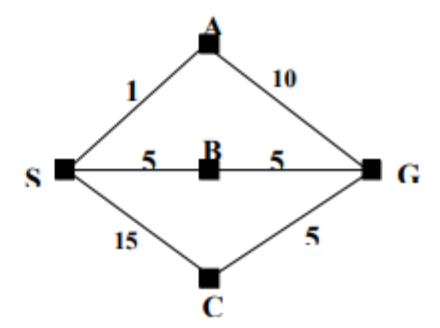

In [ ]:
def UCS_Function():
	queue = []               # create a priority queue
	queue.append([start, 0]) # insert the starting index this means we are going to start with cost 0
	visited = {}             # map to store visited node this serves as memory

	# while the queue is not empty
	while (len(queue) > 0):
		queue=sorted(queue) # sort the queue elements on the cost(in negative)
		p = queue.pop(-1)   # pop the element at the top (the one with smallest cost)
		p[0] *= -1          # get the original value of the cost
		
		if (p[1] == goal):  # check if the element is goal
			return p[0]     # return the cost value 

		# check for the non visited nodes which are adjacent to present node
		if (p[1] not in visited):
			for i in range(len(graph[p[1]])):
				# graph[p[1]] give all the nodes reachable from current node 
				#print (graph[p[1]])
				# for each reachable node x
				x = graph[p[1]][i]
				#cost of going from p[1] to new node x
				# cost of reaching node x will be the cost callculated before that is p[0]
				# added with the cost of current node p[1] to x
				# value is multiplied by -1 so that least priority is at the top
				queue.append( [   (p[0] + cost[(p[1],x)])*-1 ,      x] )
		# mark as visited
		visited[p[1]] = 1

# create the graph
graph = [[] for i in range(4)]
cost = {}

# add edge
# from 0 we can go to 1,2,3
graph[0].append(1)
graph[0].append(2)
graph[0].append(3)
# from 1 we can go to 4
graph[1].append(4)
# from 2 we can go to 4
graph[2].append(4)
# from 3 we can go to 4
graph[3].append(4)
#print(graph)

# add the cost
# cost for travelling from 0 t0 1 is 1
cost[(0, 1)] = 1
cost[(0, 2)] = 5
cost[(0, 3)] = 11
cost[(1, 4)] = 10
cost[(2, 4)] = 5
cost[(3, 4)] = 5
#print(cost)

# start and goal state
start= 0
goal = 4

print("Minimum cost from 0 to 4 is = ",UCS_Function())
print ("*********END*********")


Minimum cost from 0 to 4 is =  10
*********END*********
